TASK 1

Task 1.1: Develop a Cython version of the STREAM benchmark. Make sure to define the ctypes for obtaining full performance.

In [2]:
#We start by running the code from the previous task, and plot the bandwidth versus size of array used for the array data type
!python3 stream.py

Running test 1 out of 10
Running test 2 out of 10
Running test 3 out of 10
Running test 4 out of 10
Running test 5 out of 10
Running test 6 out of 10
Running test 7 out of 10
Running test 8 out of 10
Running test 9 out of 10
Running test 10 out of 10


In [ ]:
#We now run the cythonized version. The function run_STREAM_average was cythonized to be numpy arrays. You can see how in the files cythonfn.pyx and stream_cythonized.py
#The program plots the bandwidth results varying the arrays' size, as asked in tasl 1.2
!python3 setup.py build_ext --inplace
!oython3 stream_cythonized.py

In [9]:
import numpy as np
from timeit import default_timer as timer

def gauss_seidel(f):
    newf = f.copy()
    
    for i in range(1,newf.shape[0]-1):
        for j in range(1,newf.shape[1]-1):
            newf[i,j] = 0.25 * (newf[i,j+1] + newf[i,j-1] +
                                   newf[i+1,j] + newf[i-1,j])
    
    return newf

In [ ]:
grid_sizes = [10 * i for i in range(30)]

start = timer()

n_experiments = 2

results = []

for s in grid_sizes:
    print("Grid size: ", s)
    times = np.zeros((n_experiments))
    for i in range(n_experiments):
        print("Experiment: ", i)
        f = np.zeros((s, s))
        f[1:-1, 1:-1] = 1
        
        start = timer()
        for j in range(1000):    
            f = gauss_seidel(f)
        end = timer()
        
        times[i] = end - start
    
    results.append(np.mean(times))
    print(results[-1])

Grid size:  0
Experiment:  0
Experiment:  1
0.0014013709987921175
Grid size:  10
Experiment:  0
Experiment:  1
0.057862604000547435
Grid size:  20
Experiment:  0
Experiment:  1
0.2736700649984414
Grid size:  30
Experiment:  0
Experiment:  1
0.642193783998664
Grid size:  40
Experiment:  0
Experiment:  1
1.259261373499612
Grid size:  50
Experiment:  0
Experiment:  1
1.95040434999828
Grid size:  60
Experiment:  0
Experiment:  1
2.8719587690029584
Grid size:  70
Experiment:  0
Experiment:  1
3.918388619498728
Grid size:  80
Experiment:  0
Experiment:  1
5.071308112499537
Grid size:  90
Experiment:  0
Experiment:  1
6.519589134499256
Grid size:  100
Experiment:  0
Experiment:  1
8.62366973999815
Grid size:  110
Experiment:  0
Experiment:  1
10.295055856502586
Grid size:  120
Experiment:  0
Experiment:  1
11.162759512997582
Grid size:  130
Experiment:  0
Experiment:  1
13.15735213950029
Grid size:  140
Experiment:  0
Experiment:  1
16.834720721999474
Grid size:  150
Experiment:  0
Experiment

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def get_points_xy(grid_sizes, results):
    points = []

    for i in range(len(grid_sizes)):
        points.append([grid_sizes[i], results[i]])
    
        
    data = np.array([points])
    x, y = data.T
    
    return [x, y]

x, y = get_points_xy(grid_sizes, results)
plt.scatter(x, y, color="red", marker='o', label="test")
plt.title("Gauss seidel 1st implementation")
plt.xlabel('Grid size')
plt.ylabel('Time [s]')
plt.show()

IndexError: list index out of range

# Part 2.2

# Result from cProfile
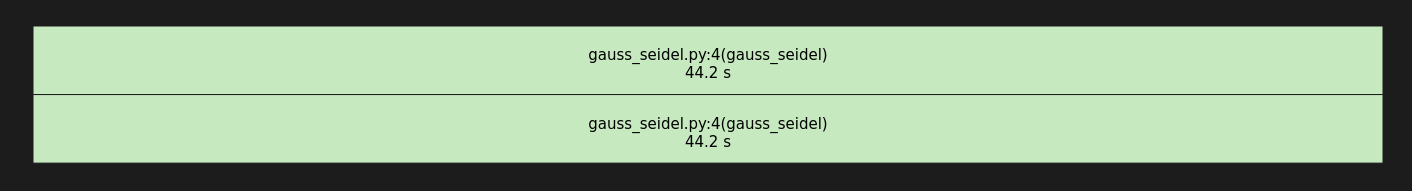
We can see that it is not very useful, it is just saying that the gauss_seidel function is taking most of the time

# Result from line_profiler
This is more helpful, we can see that line 10 is 88% of the computing time
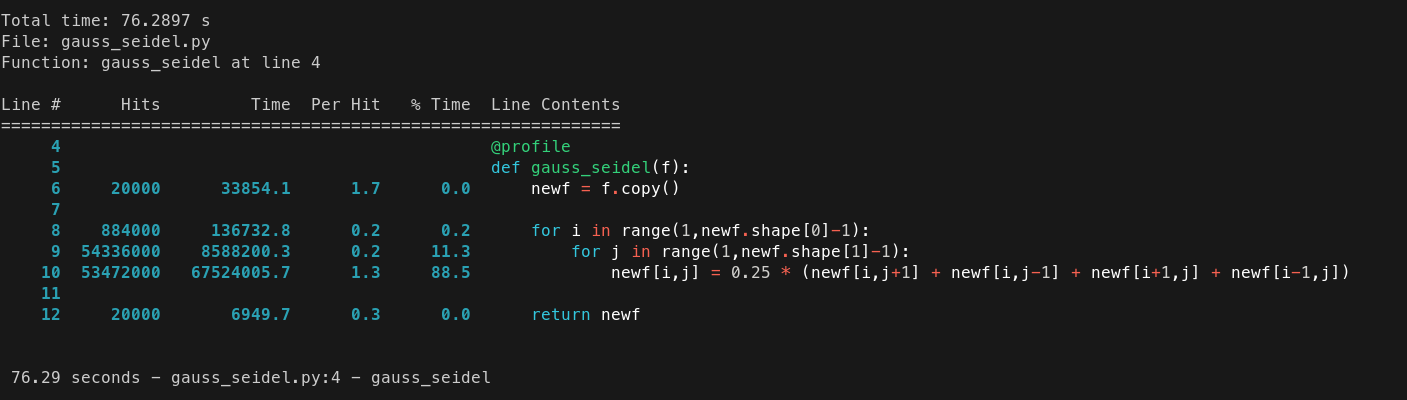

# Part 2.4 Results from Cython version

In [13]:
!cd gauss_seidel_cython && python3 setup.py build_ext --inplace && python3 cythonmain.py

Grid size:  0
Experiment:  0
Experiment:  1
0.001243421997060068
Grid size:  10
Experiment:  0
Experiment:  1
0.03485495950371842
Grid size:  20
Experiment:  0
Experiment:  1
0.1552642355018179
Grid size:  30
Experiment:  0
Experiment:  1
0.38098128699857625
Grid size:  40
Experiment:  0
Experiment:  1
0.6812592040005256
[0.00124342 0.03485496 0.15526424 0.38098129 0.6812592 ]


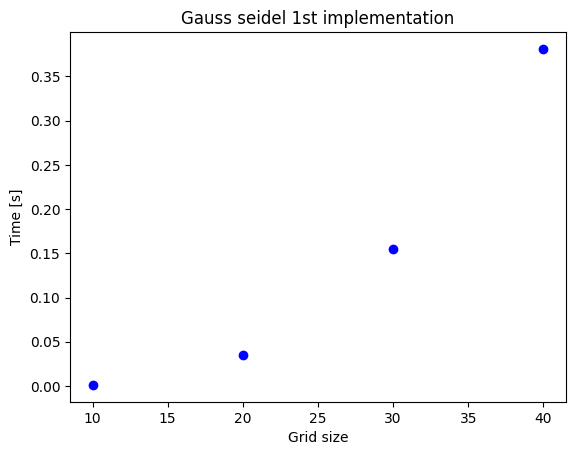

In [15]:
import numpy as np
results_cython = np.load("gauss_seidel_cython/out.npy")

# x, y = get_points_xy(grid_sizes, results)
# plt.scatter(x, y, color="red", marker='o', label="python")
grid_sizes = [10, 20, 30, 40]
x_c, y_c = get_points_xy(grid_sizes, results_cython)
plt.scatter(x_c, y_c, color="blue", marker='o', label="cython")

plt.title("Gauss seidel 1st implementation")
plt.xlabel('Grid size')
plt.ylabel('Time [s]')
plt.show()